In [1]:
# Loading libraries

import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab
import matplotlib

# Loading Datasets

In [4]:
#North pole perturbation
data_pole_path = glob.glob("/data/keeling/a/pappup2/a/CESM/cam_90_n/CESM_output_data/atm/hist/*")
data_pole_last18=data_pole_path[24:240] # Get years 3-20#
data_pole_data = xr.open_mfdataset(data_pole_last18,combine="by_coords",use_cftime=True)
data_pole_15 = data_pole_data.mean('time') # Average over the last 18 years
data_pole_15

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, lat: 96, lon: 144, slat: 95, slon: 144)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Data variables: (12/160)
    hyam           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybm           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hyai           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybi           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    P0             float64 1e+05
    date           float64 dask.array<chunksize=(), meta=np.ndarray>
    ...             ...
    pom_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a3_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>

In [6]:
#North pole perturbation
data_pole_path = glob.glob("/data/keeling/a/mailes2/a/CESM_DATA/aqua_northpoleperturb/outputdata/atm/hist/*")
data_pole_last18=data_pole_path[24:240] # Get years 3-20#
data_pole_data = xr.open_mfdataset(data_pole_last18,combine="by_coords",use_cftime=True)
data_pole_10 = data_pole_data.mean('time') # Average over the last 18 years
data_pole_10

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, lat: 96, lon: 144, slat: 95, slon: 144)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Data variables: (12/160)
    hyam           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybm           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hyai           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybi           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    P0             float64 1e+05
    date           float64 dask.array<chunksize=(), meta=np.ndarray>
    ...             ...
    pom_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a3_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>

Text(0.5, 1.0, 'MG 1.0')

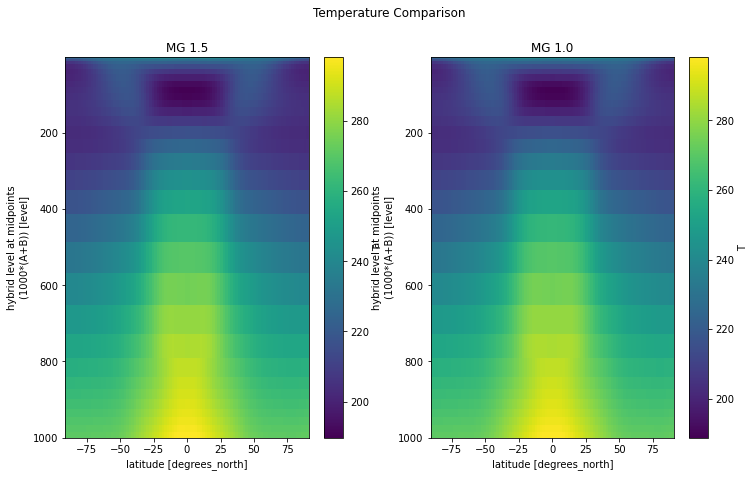

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]

plt.suptitle('Temperature Comparison')
plt.subplot(1,2,1)
data_pole_15.T.mean('lon').plot(yincrease=False)
plt.title('MG 1.5')
plt.subplot(1,2,2)
data_pole_10.T.mean('lon').plot(yincrease=False)
plt.title('MG 1.0')

Text(0.5, 1.0, 'MG 1.5 - MG 1.0')

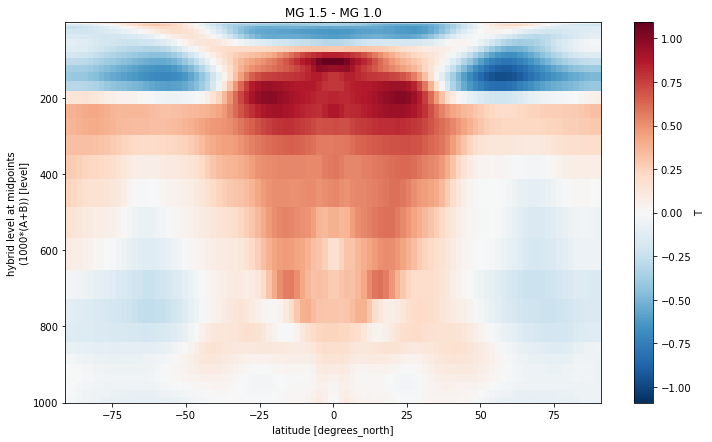

In [11]:
delta_T = data_pole_15.T.mean('lon') - data_pole_10.T.mean('lon')
delta_T.plot(yincrease=False)
plt.title('MG 1.5 - MG 1.0')

In [15]:
toa_15 = data_pole_15.FSNT.mean('lon') - data_pole_15.FLNT.mean('lon')
toa_15.load()
toa_10 = data_pole_10.FSNT.mean('lon') - data_pole_10.FLNT.mean('lon')
toa_10.load()

<xarray.DataArray (lat: 96)>
array([-1.95513504e+02, -1.85943604e+02, -1.77304749e+02, -1.69004150e+02,
       -1.60839279e+02, -1.52308487e+02, -1.43509293e+02, -1.34523148e+02,
       -1.25374306e+02, -1.16144089e+02, -1.06850456e+02, -9.75849075e+01,
       -8.83571548e+01, -7.92273712e+01, -7.02055054e+01, -6.12634735e+01,
       -5.23571625e+01, -4.38647003e+01, -3.60343323e+01, -2.89516602e+01,
       -2.26160431e+01, -1.69683075e+01, -1.14710083e+01, -5.75149536e+00,
        1.74438477e-01,  6.09486389e+00,  1.20694733e+01,  1.70830536e+01,
        2.10367584e+01,  2.45748749e+01,  2.74721680e+01,  2.97692719e+01,
        3.10147552e+01,  3.18211060e+01,  3.30346527e+01,  3.52374420e+01,
        3.92881470e+01,  4.54788208e+01,  5.24671631e+01,  5.81220398e+01,
        6.23523865e+01,  6.55658264e+01,  6.82951050e+01,  7.09545288e+01,
        7.30088348e+01,  7.38631592e+01,  7.14209900e+01,  6.86236877e+01,
        6.86605682e+01,  7.13439331e+01,  7.34010315e+01,  7.21173401e+01,
        6.94978943e+01,  6.64346619e+01,  6.38690186e+01,  6.06899719e+01,
        5.62688293e+01,  4.98235779e+01,  4.21444092e+01,  3.54323425e+01,
        3.10177612e+01,  2.82631378e+01,  2.66498718e+01,  2.55115509e+01,
        2.40868073e+01,  2.17311554e+01,  1.85688782e+01,  1.45623322e+01,
        9.99179077e+00,  3.88090515e+00, -2.75144958e+00, -8.99958801e+00,
       -1.45960541e+01, -1.94320221e+01, -2.39289551e+01, -2.85803528e+01,
       -3.38734436e+01, -3.97895508e+01, -4.65174255e+01, -5.41838684e+01,
       -6.24441528e+01, -7.10110931e+01, -7.97644348e+01, -8.87516861e+01,
       -9.78822174e+01, -1.07103317e+02, -1.16413284e+02, -1.25733902e+02,
       -1.35105972e+02, -1.44533432e+02, -1.53871796e+02, -1.62277161e+02,
       -1.69262299e+02, -1.75611130e+02, -1.82251373e+02, -1.90128143e+02],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

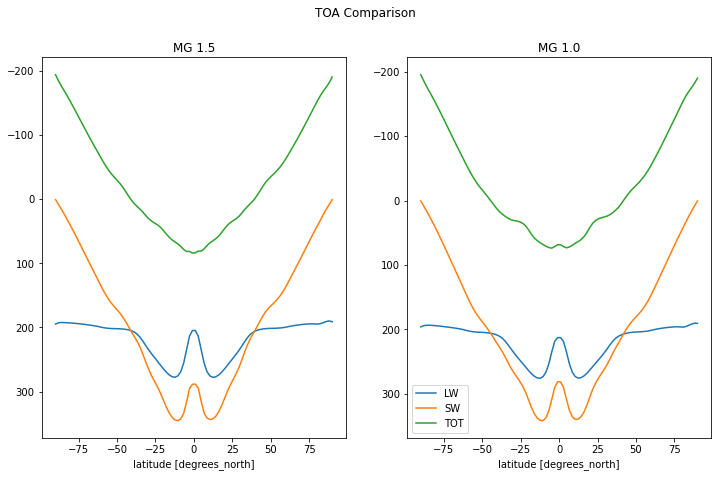

In [19]:
plt.suptitle('TOA Comparison')
plt.subplot(1,2,1)
data_pole_15.FLNT.mean('lon').plot(label='LW')
data_pole_15.FSNT.mean('lon').plot(label='SW')
toa_15.plot(yincrease=False, label='TOT')
plt.title('MG 1.5')
plt.subplot(1,2,2)
data_pole_10.FLNT.mean('lon').plot(label='LW')
data_pole_10.FSNT.mean('lon').plot(label='SW')
toa_10.plot(yincrease=False, label='TOT')
plt.title('MG 1.0')
plt.legend()

In [20]:
delta_FLNT = data_pole_15.FLNT.mean('lon') - data_pole_10.FLNT.mean('lon')
delta_FLNT.load()
delta_FSNT = data_pole_15.FSNT.mean('lon') - data_pole_10.FSNT.mean('lon')
delta_FSNT.load()
delta_toa = toa_15 - toa_10

Text(0.5, 1.0, 'MG 1.5 - MG 1.0')

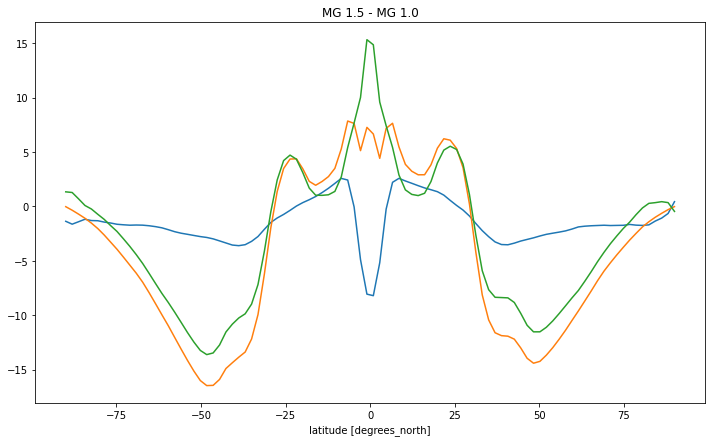

In [21]:
delta_FLNT.plot(label='FLNT')
delta_FSNT.plot(label='FSNT')
delta_toa.plot(label='TOT')
plt.title('MG 1.5 - MG 1.0')